# Estimated error comparisons for SuperLearner
How do the three error types compare:
1. actual error (i.e. observations - predictions)
2. estimated error (using predicted value as an estimator for the error)
3. uncertainty in predictions (standard deviation across SL ensemble members)

In [ ]:
! conda install -y -q pandas matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up repo for using a specific branch
data_prefix='/home/sfgary/tmp/dynamic-learning-rivers'
! git clone https://github.com/parallelworks/dynamic-learning-rivers {data_prefix}
! cd {data_prefix}; git checkout Nov-2023-log10-DO-update-correct

fatal: destination path '/home/sfgary/tmp/dynamic-learning-rivers' already exists and is not an empty directory.
Already on 'Nov-2023-log10-DO-update-correct'
Your branch is up to date with 'origin/Nov-2023-log10-DO-update-correct'.


In [3]:
input = pd.read_csv(data_prefix+"/scripts/prep_01_output_train.csv")
avg_output = pd.read_csv(data_prefix+'/scripts/post_01_output_ml_predict_avg.csv')
std_output = pd.read_csv(data_prefix+'/scripts/post_01_output_ml_predict_std.csv')

input.set_index('Sample_ID',inplace=True)
avg_output.set_index('Sample_ID',inplace=True)
std_output.set_index('Sample_ID',inplace=True)

In [4]:
avg_merge = pd.merge(
    input,
    avg_output, 
    #on='Sample_ID', 
    #how='outer',
    left_index=True,
    right_index=True,
    suffixes=['_obs','_pre_avg'])

all_merge = pd.merge(
    avg_merge,
    std_output, 
    #on='Sample_ID', 
    #how='outer',
    left_index=True,
    right_index=True,
    suffixes=['','_pre_std'])

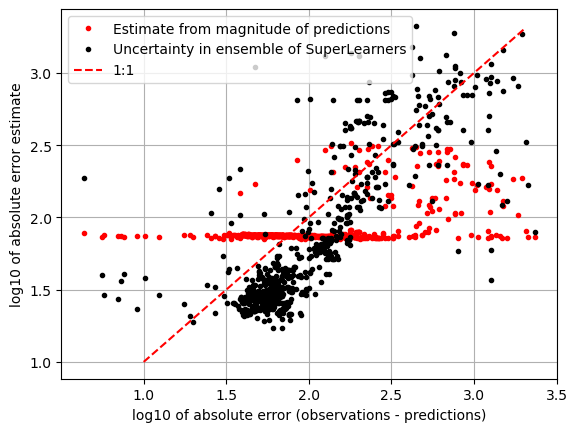

In [23]:
# Plot the observed errors versus the other two metrics
# on a log10(abs()) basis
fig, ax = plt.subplots(1,1)

# True error
true_error = np.log10(np.abs(all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_obs'] - all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg']))

# Average estimated error and its uncertainty
avg_est_error = np.log10(np.abs(all_merge['mean.error']))
uncert_est_error = np.log10(np.abs(all_merge['mean.error_pre_std']))

# This was a unique field in the merge operation
# above and so it doesn't get the _pre_std suffix
uncert_in_prediction = np.log10(np.abs(all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment']))

#ax.errorbar(true_error,avg_est_error,yerr=uncert_est_error,fmt='r.')
ax.plot(true_error,avg_est_error,'r.')
ax.plot(true_error,uncert_in_prediction,'k.')

ax.plot(np.log10([10,2000]),np.log10([10,2000]),'r--')

ax.set_xlabel('log10 of absolute error (observations - predictions)')
ax.set_ylabel('log10 of absolute error estimate')

ax.legend(['Estimate from magnitude of predictions','Uncertainty in ensemble of SuperLearners','1:1'])

ax.grid()

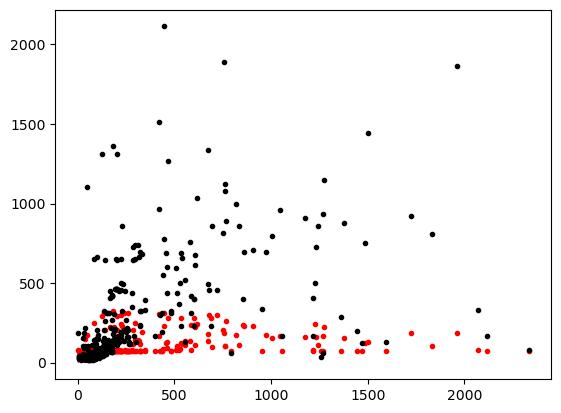

In [20]:
# Plot the observed errors versus the other two metrics
# on an absolute error basis
fig, ax = plt.subplots(1,1)

# True error
true_error = np.abs(all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_obs'] - all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg'])

# Average estimate error and its uncertainty
avg_est_error = np.abs(all_merge['mean.error'])
uncert_est_error = np.abs(all_merge['mean.error_pre_std'])

# This was a unique field in the merge operation
# above and so it doesn't get the _pre_std suffix
uncert_in_prediction = np.abs(all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])

#ax.errorbar(true_error,avg_est_error,yerr=uncert_est_error,fmt='r.')
ax.plot(true_error,avg_est_error,'r.')
ax.plot(true_error,uncert_in_prediction,'k.')

ax.plot(np.log10([10,2000]),np.log10([10,2000]),'r--')

#ax.set_ylim([0,1])

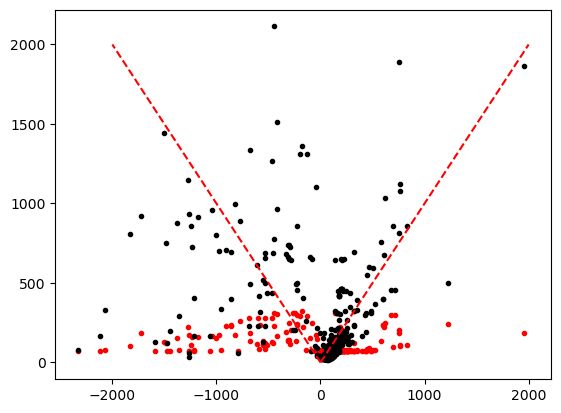

In [7]:
# Plot the observed errors versus the other two metrics
fig, ax = plt.subplots(1,1)

# True error
true_error = all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_obs'] - all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg']

# Average estimate error and its uncertainty
avg_est_error = all_merge['mean.error']
uncert_est_error = all_merge['mean.error_pre_std']

# This was a unique field in the merge operation
# above and so it doesn't get the _pre_std suffix
uncert_in_prediction = all_merge['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment']

#ax.errorbar(true_error,avg_est_error,yerr=uncert_est_error,fmt='r.')
ax.plot(true_error,avg_est_error,'r.')
ax.plot(true_error,uncert_in_prediction,'k.')

# 1:1 lines
ax.plot([0,2000],[0,2000],'r--')
ax.plot([0,-2000],[0,2000],'r--')

#ax.set_ylim([50,100])

In [15]:
all_merge.columns

Index(['Sample_Longitude_obs', 'Sample_Latitude_obs', 'Mean_Temp_Deg_C', 'pH',
       'Mean_DO_mg_per_L', 'Mean_DO_percent_saturation',
       'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_obs',
       'Sample_Longitude_pre_avg', 'Sample_Latitude_pre_avg',
       'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment_pre_avg',
       'mean.error', 'predict.error', 'pca.dist', 'mean.error.scaled',
       'pca.dist.scaled', 'combined.metric', 'Sample_Longitude',
       'Sample_Latitude',
       'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment',
       'mean.error_pre_std', 'predict.error_pre_std', 'pca.dist_pre_std',
       'mean.error.scaled_pre_std', 'pca.dist.scaled_pre_std',
       'combined.metric_pre_std'],
      dtype='object')